# Problem_3 & Problem 4.c

In [36]:
import math
import os
import re #dic ro
import nltk
from unidecode import unidecode
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
import spacy as sp
nltk.download('punkt')
nltk.download('omw')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw to /home/jovyan/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Importing the data

In [37]:
directory_file=os.getcwd()
filepath=os.path.join(directory_file,'data','texts.txt')

In [38]:
def read_file():
    with open(filepath,'r',encoding='utf-8') as file:
        return file.read()

full_text=read_file()

Getting all of the sentence

In [39]:
def get_all_sentences():
    sentences=re.split(r'(?<=[.!?])\s+(?=[A-Z]|[a-z])',full_text)
    return sentences
get_all_sentences()

['Mesaj de informare: \nCursul și laboratoarele de Inteligență Artificială vor fi o \nprovocare pentru toți.',
 'Suntem convinși că veți realiza proiecte \nfoarte interesante.',
 'Vă încurajăm să adresați întrebări atunci \ncând ceva nu e clar, atât în mod live, cât și folosind platforma \nTeams, canalul ”general”.',
 'Dacă ați citit până aici, vă rugăm să lăsați un mesaj pe canalul \ngeneral cu textul ”Am citit textul pentru problema 3”.',
 'Mesaj de informare generat de ChatGPT:\nStimați cursanți,\nSuntem încântați să vă avem în echipa noastră pentru Cursul și \nlaboratoarele de Inteligență Artificială.',
 'Această experiență va \nfi o adevărată provocare, dar suntem convinși că veți realiza \nproiecte extrem de interesante.',
 'Vă încurajăm să fiți activi și să adresați întrebări atunci când \nceva nu este clar.',
 'Fie că este vorba de o discuție în timp real \nsau prin intermediul platformei Teams, canalul ”general”, suntem \naici să vă sprijinim.',
 'Succes și să înceapă aventura

### Getting number of sentences

In [40]:
def number_of_sentences():
    return len(get_all_sentences())
number_of_sentences()

10

Getting all of the words from a text

In [41]:
def get_all_words(text):
    words = re.findall(r'\w+', text)
    return words

Number of words of text.

In [42]:
def number_of_words():
    return len(get_all_words(full_text))
number_of_words()

156

Number of different words.

In [43]:
def number_of_different_words():
    return len(set(get_all_words(full_text)))
number_of_different_words()

94

Shortest words from text.

In [44]:
def shortest_word():
    return min(get_all_words(full_text),key=len)
shortest_word()

'o'

Longest word from text.

In [45]:
def longest_word() -> str:
    return max(get_all_words(full_text),key=len)
longest_word()

'laboratoarele'

### Shortest and longest word

In [46]:
def shortest_and_longest_word():
    return f'Shortest word from text is {shortest_word()} and longest {longest_word()}'
shortest_and_longest_word()

'Shortest word from text is o and longest laboratoarele'

### Text without diacritics

In [47]:
def test_without_diacritics():
    return unidecode(full_text)
test_without_diacritics()

'Mesaj de informare: \nCursul si laboratoarele de Inteligenta Artificiala vor fi o \nprovocare pentru toti. Suntem convinsi ca veti realiza proiecte \nfoarte interesante. Va incurajam sa adresati intrebari atunci \ncand ceva nu e clar, atat in mod live, cat si folosind platforma \nTeams, canalul "general". \nDaca ati citit pana aici, va rugam sa lasati un mesaj pe canalul \ngeneral cu textul "Am citit textul pentru problema 3". \nMesaj de informare generat de ChatGPT:\nStimati cursanti,\nSuntem incantati sa va avem in echipa noastra pentru Cursul si \nlaboratoarele de Inteligenta Artificiala. Aceasta experienta va \nfi o adevarata provocare, dar suntem convinsi ca veti realiza \nproiecte extrem de interesante.\nVa incurajam sa fiti activi si sa adresati intrebari atunci cand \nceva nu este clar. Fie ca este vorba de o discutie in timp real \nsau prin intermediul platformei Teams, canalul "general", suntem \naici sa va sprijinim.\nSucces si sa inceapa aventura AI!\nCu consideratie, Echi

### Synonyms for longest word in the text file

In [48]:
def synonyms_for_longest_word():
    # Get the longest word from the text
    longest:str = longest_word()

    nlp = sp.load("ro_core_news_sm")
    doc =nlp(longest)
    # Initialize RoWordNet
    root_word = doc[0].lemma_
    sinonime = set()
    for s in wordnet.synsets(root_word, lang='ron'):
        for l in s.lemmas(lang='ron'):
            sinonime.add(l.name())
    list(sinonime)
    return sinonime
synonyms_for_longest_word()

{'laborator',
 'laboratordecercetare',
 'laboratordeștiințe',
 'poligondeîncercare'}

Normalize through the method given

In [49]:
def normalize_method(freq,min_freq,max_freq,nr_cuvinte,method):
    if(method=='simple'):
        return freq/nr_cuvinte
    if(method=='min-max'):
        if(min_freq-max_freq==0):
            return 0.5
        return (freq - min_freq) / (max_freq - min_freq)

Determine the frequency of words for each sentence

In [29]:
def frequencies():
    sequences=re.split(r'(?<=[.!?])\s+(?=[A-Z]|[a-z])',test_without_diacritics())
    frequencies = []
    nlp = sp.load("ro_core_news_sm")

    # Loop through each sentence
    for sentence in sequences:
        words = get_all_words(sentence.lower())
        # Calculate word frequencies
        frequency_w = {}
        for word_l in words:
            doc = nlp(word_l)
            # Initialize RoWordNet
            word= doc[0].lemma_
            if word in frequency_w:
                frequency_w[word] += 1
            else:
                frequency_w[word] = 1
        # Normalize word frequencies
        frequencies.append(frequency_w)
    return frequencies

Getting the number of apparitions of words in the overall text.

In [30]:
def word_frequencies_not_normalized():
    frequencies_not_norm=frequencies()
    words = {}
    for freqency in frequencies_not_norm:
        for word,freq in freqency.items():
            if word not in words:
                words[word]=freq
            else:
                words[word]+=freq
    return words

In [31]:
def normalizing(method):
    words= word_frequencies_not_normalized()
    min_freq = min(words.values())
    max_freq = max(words.values())
    for word, freq in words.items():
        words[word] = normalize_method(freq, min_freq, max_freq, len(words),method)  # calculez pentru fiecare prop frecveenta normalizata in prop
    return words

The histogram not normalized

In [32]:
def basic_histogram():
    words=word_frequencies_not_normalized()
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
    for word,frequence in words.items():
        ax1.hist(frequence,bins=20,alpha=0.8,label=word)
    ax1.set_xlabel('Aparitions')
    ax1.set_ylabel('Number of sequences')
    ax1.legend()
    ax1.set_title('Histogram of aparitions')
    ax2.bar(words.keys(),words.values())
    ax2.set_xlabel('Words')
    ax2.set_ylabel('Aparitions')
    ax2.set_title('Histogram of aparitions')
    ax2.set_xticks(range(len(words)))
    ax2.set_xticklabels(words.keys(),rotation=90)
    fig.show()
    

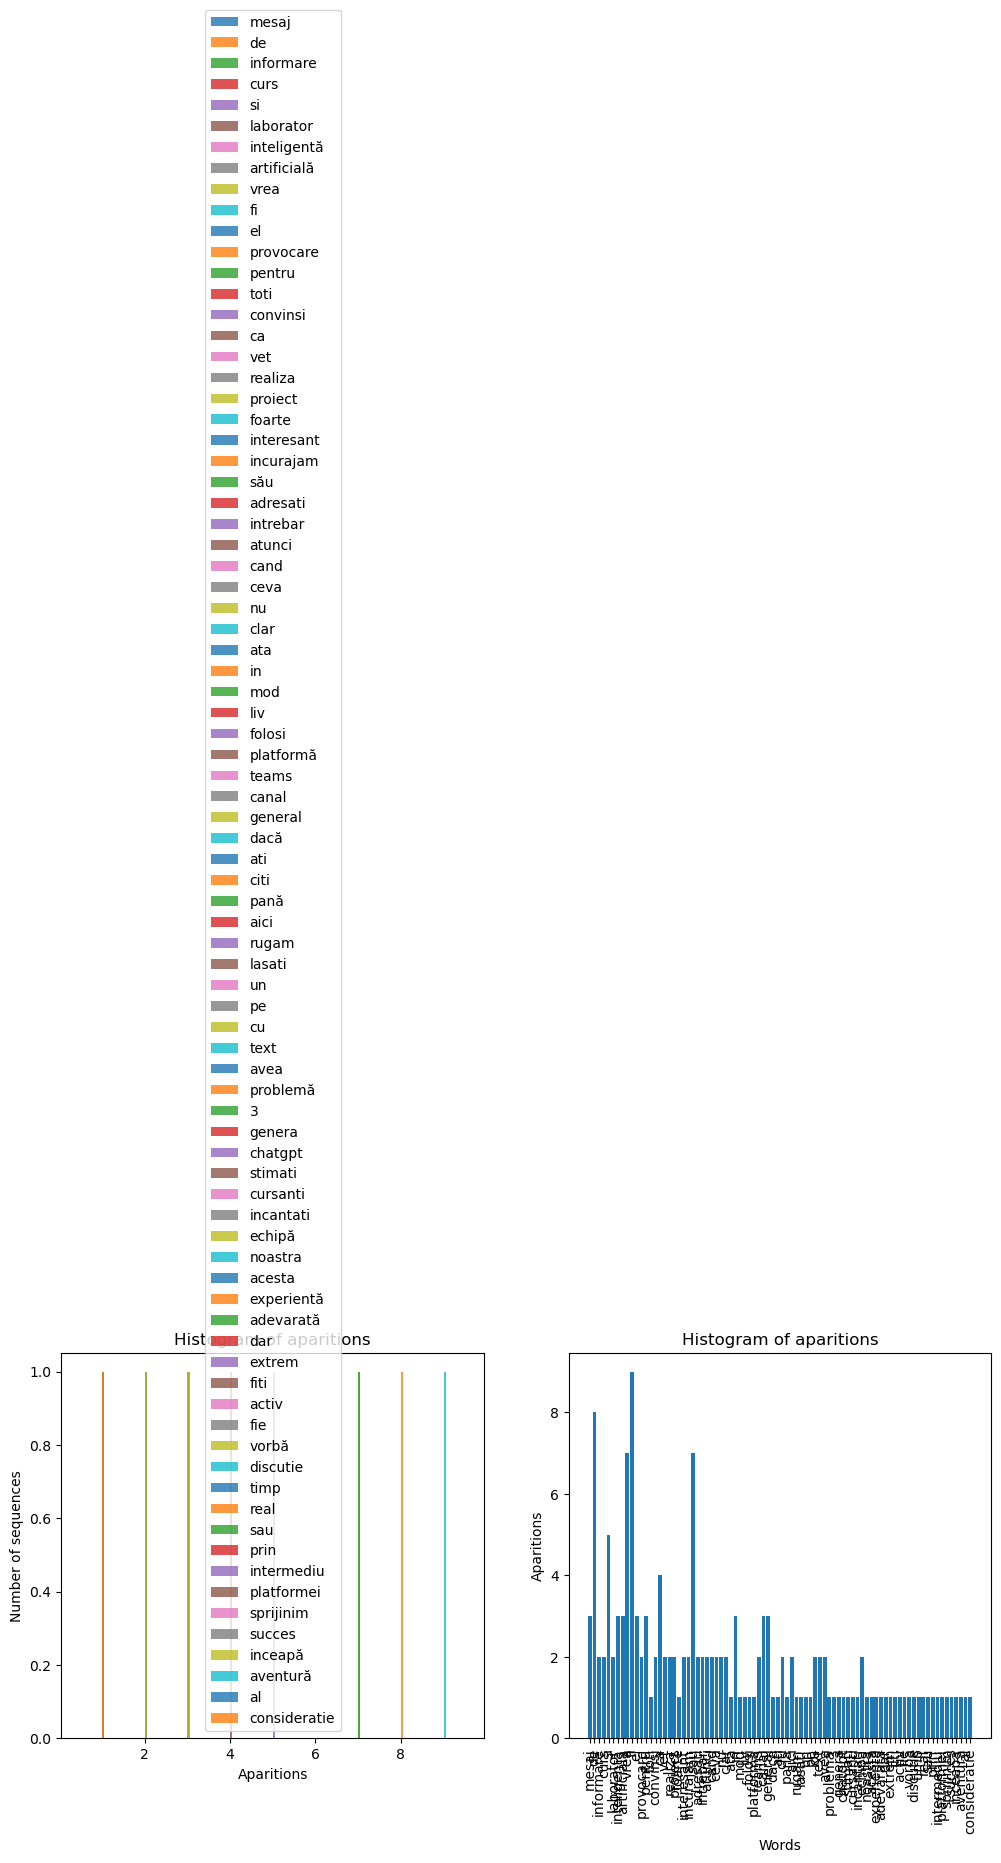

In [33]:
basic_histogram()

Seeing the histogram normalized.

In [34]:
def histogram(method):
    words=normalizing(method)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    for word,frequences in words.items():
        ax1.hist(frequences,bins=20,alpha=0.5,label=word)
    
    ax1.set_xlabel('Aparitions normalized')
    ax1.set_ylabel('Number of sequences')
    ax1.legend()
    ax1.set_title('Histogram with '+method+' normalization')
    ax2.bar(words.keys(),words.values())
    ax2.set_xlabel('Words')
    ax2.set_ylabel('Normalized'+method)
    ax2.set_title('Histogram '+method)
    ax2.set_xticks(range(len(words)))
    ax2.set_xticklabels(words.keys(),rotation=90)
    fig.show()


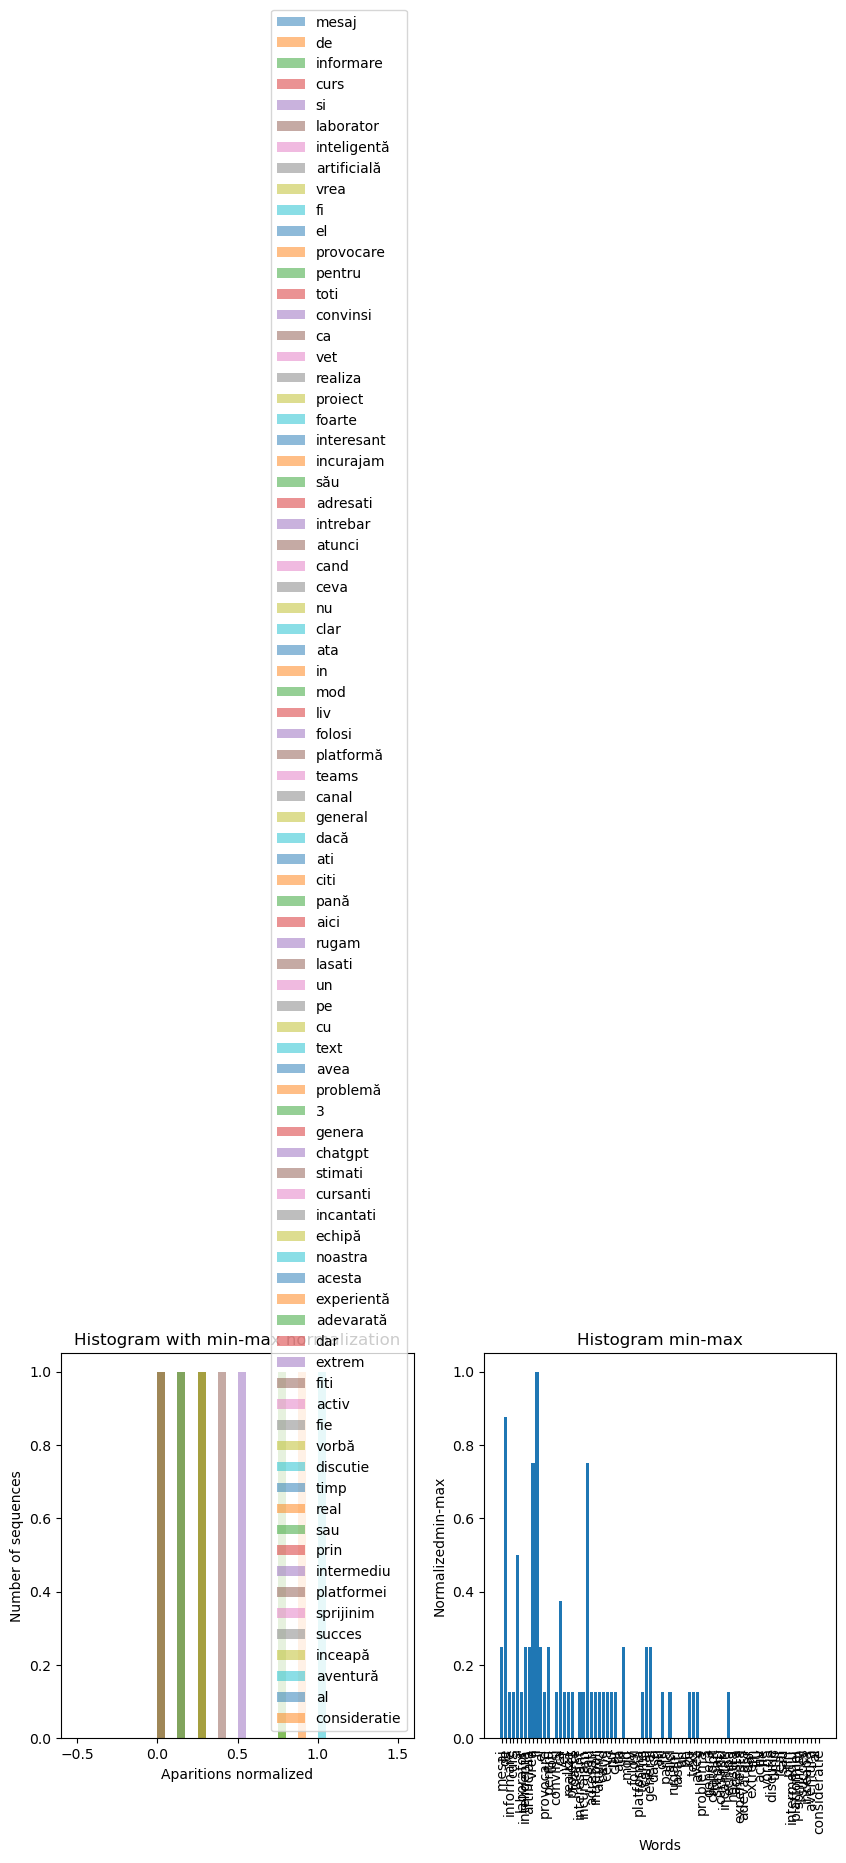

In [26]:
histogram('min-max')


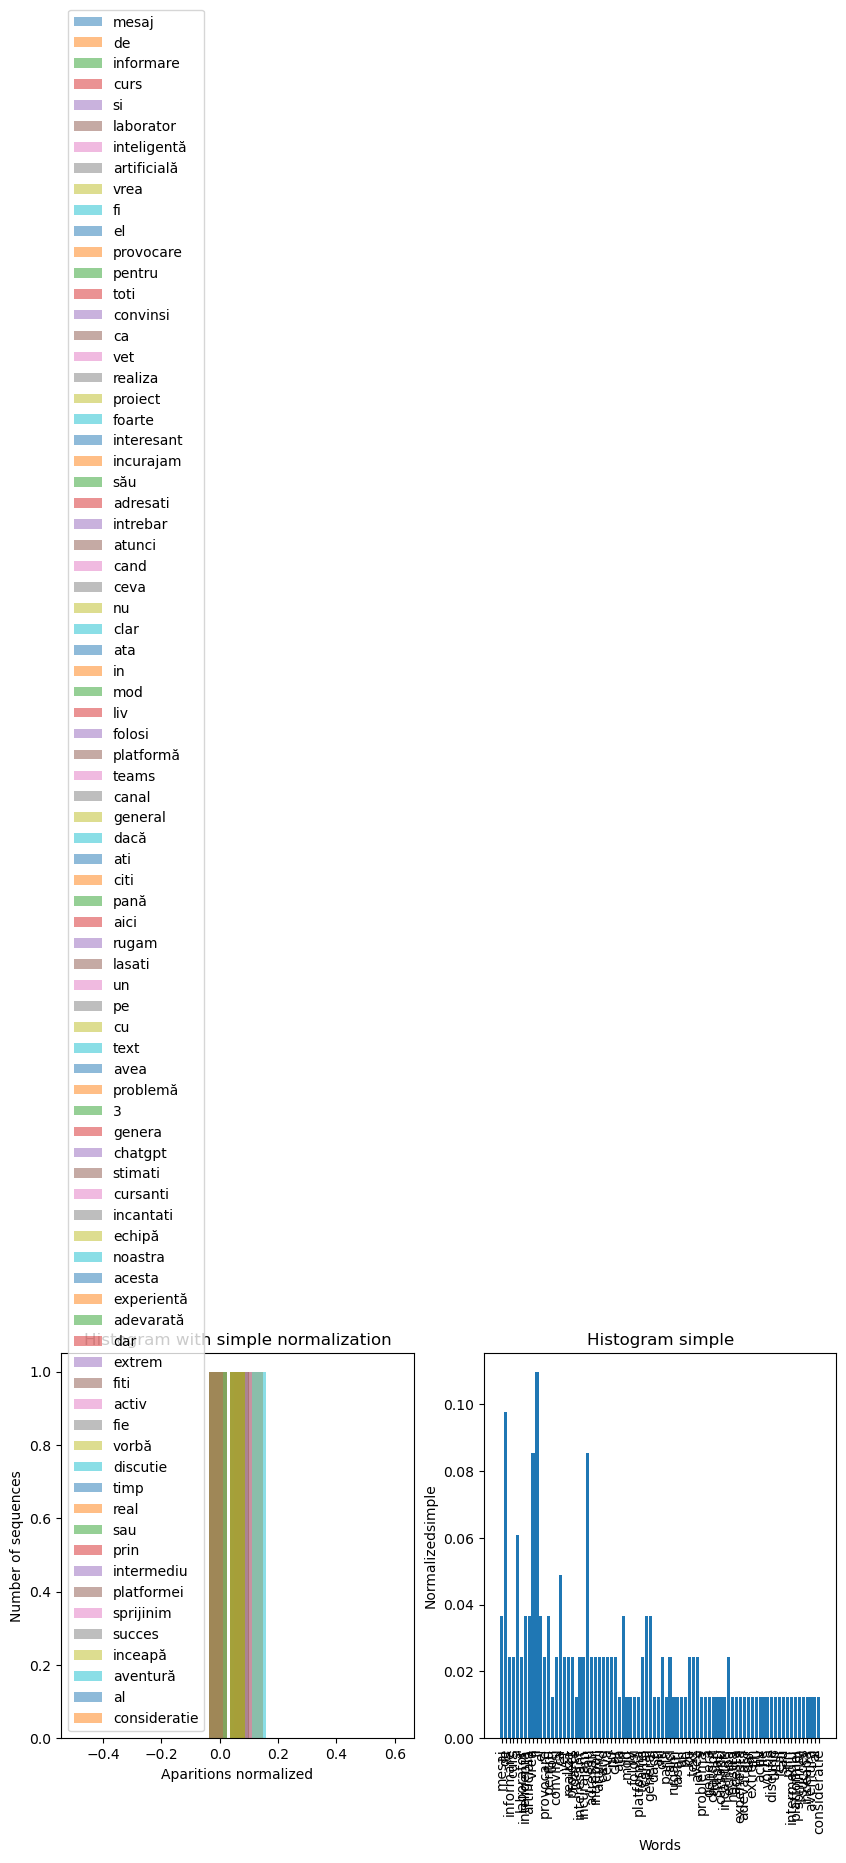

In [35]:
histogram('simple')